# Assignment 1

## *How should I price auto insurance in the United States?*

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Your task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases. You will be using the Python `statsmodels` package to create and analyze these linear models.

In [74]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## Diving into the data

In [75]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [76]:
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,5,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,6,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,7,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,8,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,9,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


### Exercise 1:

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

**Answer.**

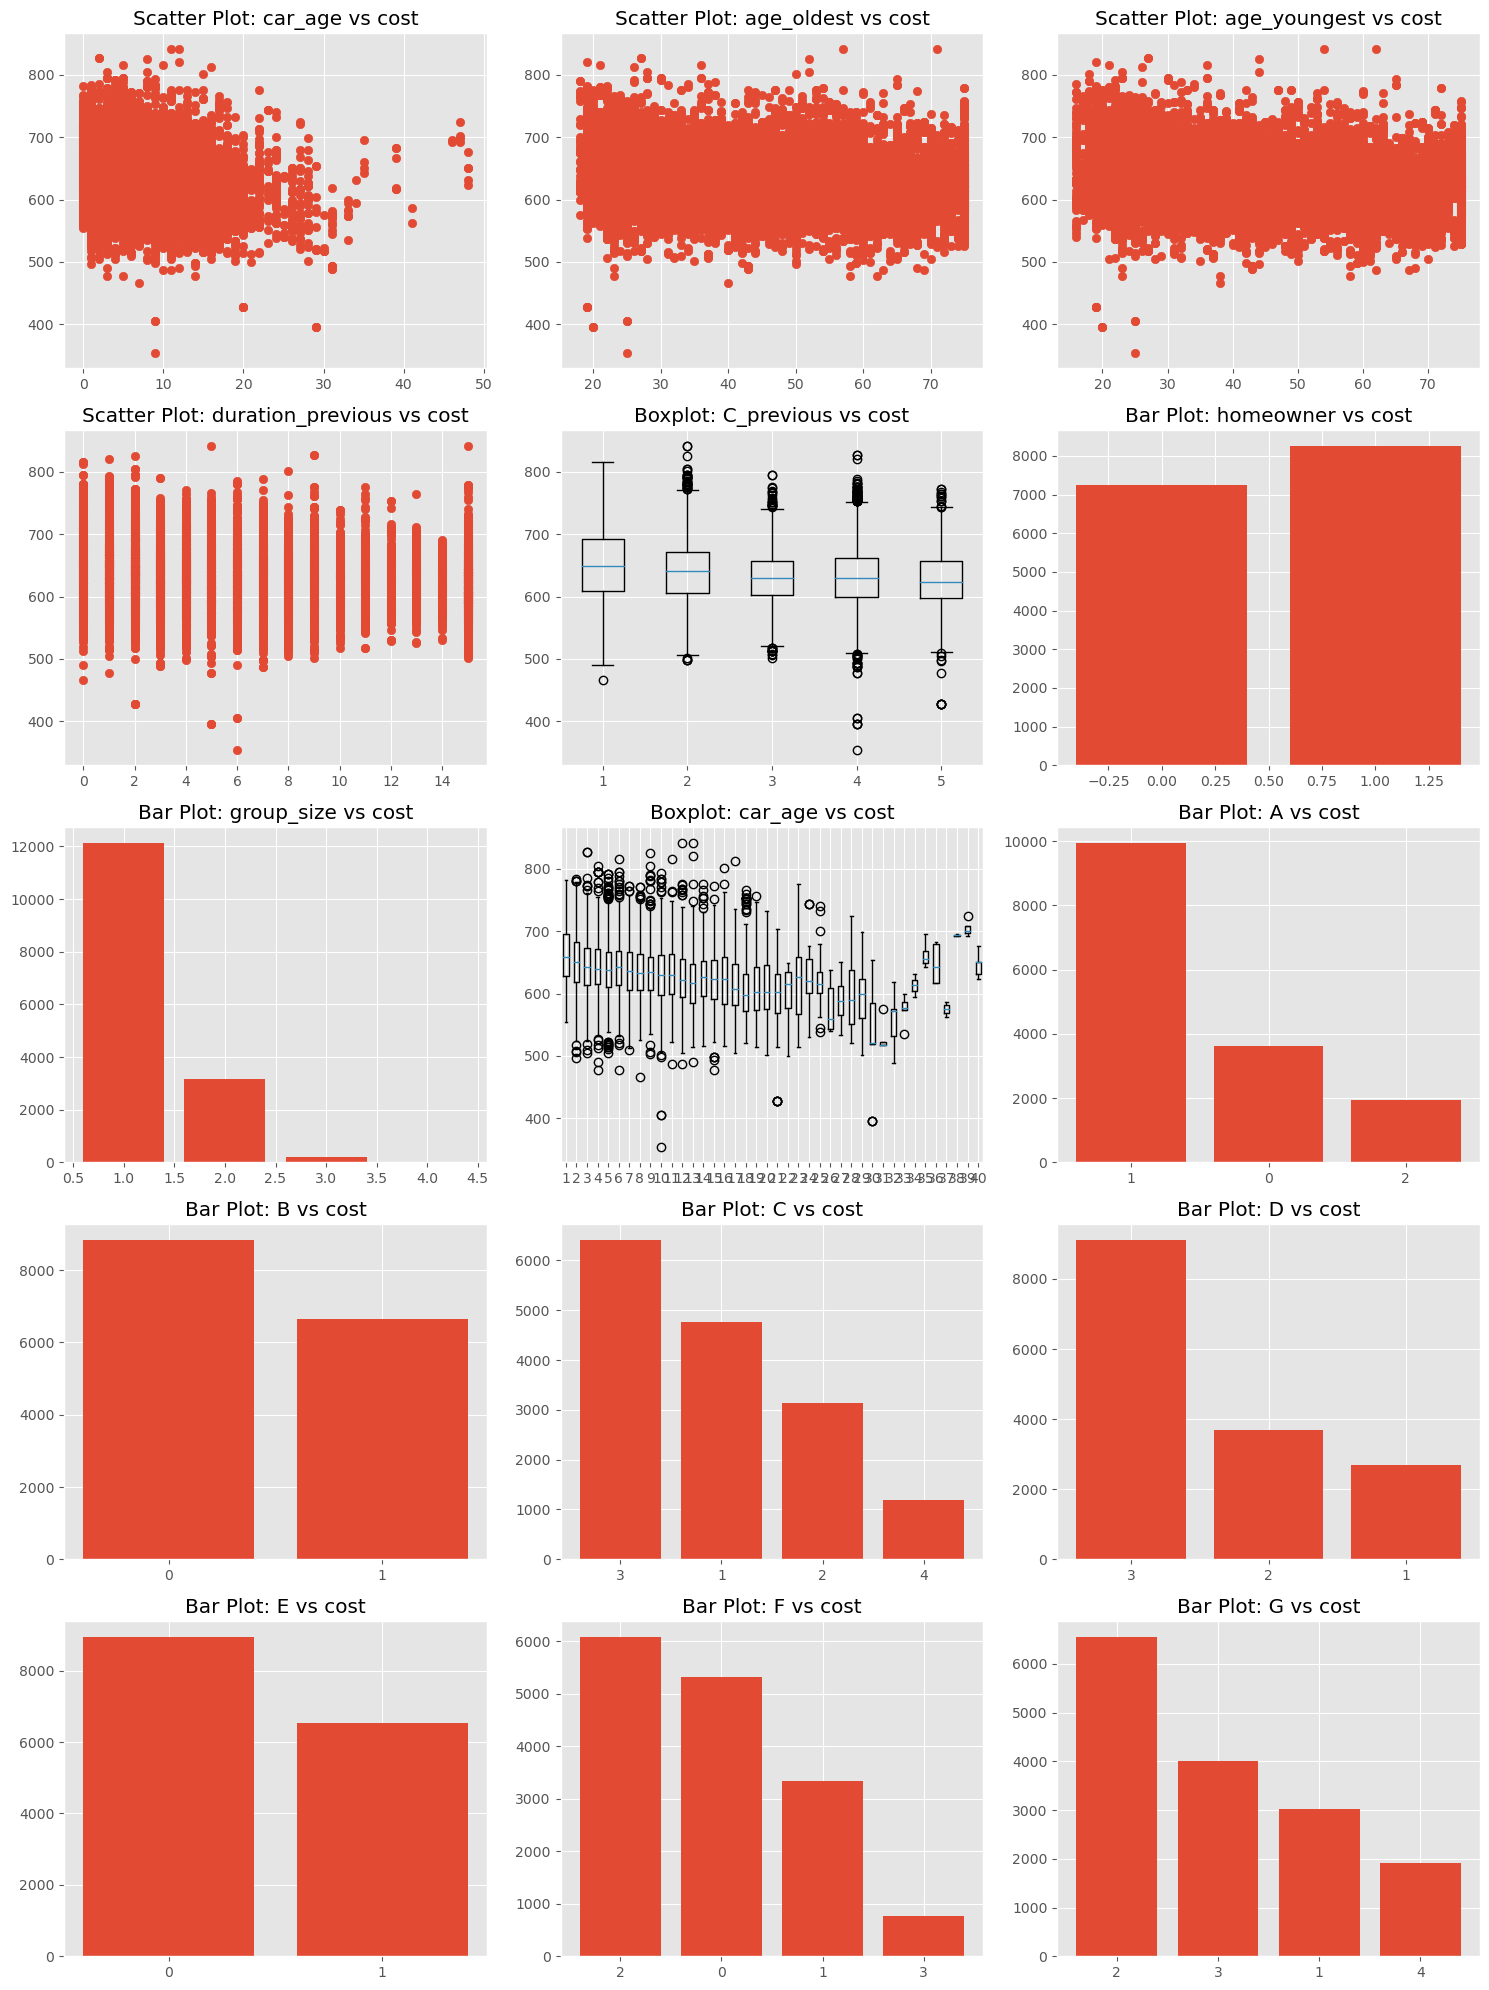

In [77]:
# Set up subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# Scatter plot for 'car_age'
axes[0, 0].scatter(df['car_age'], df['cost'])
axes[0, 0].set_title('Scatter Plot: car_age vs cost')

# Scatter plot for 'age_oldest'
axes[0, 1].scatter(df['age_oldest'], df['cost'])
axes[0, 1].set_title('Scatter Plot: age_oldest vs cost')

# Scatter plot for 'age_youngest'
axes[0, 2].scatter(df['age_youngest'], df['cost'])
axes[0, 2].set_title('Scatter Plot: age_youngest vs cost')

# Scatter plot for 'duration_previous'
axes[1, 0].scatter(df['duration_previous'], df['cost'])
axes[1, 0].set_title('Scatter Plot: duration_previous vs cost')

# Boxplot for 'C_previous'
axes[1, 1].boxplot(df.groupby('C_previous')['cost'].apply(list))
axes[1, 1].set_title('Boxplot: C_previous vs cost')

# Bar plot for 'homeowner'
homeowner_counts = df['homeowner'].value_counts()
axes[1, 2].bar(homeowner_counts.index, homeowner_counts.values)
axes[1, 2].set_title('Bar Plot: homeowner vs cost')

# Bar plot for 'group_size'
group_size_counts = df['group_size'].value_counts()
axes[2, 0].bar(group_size_counts.index, group_size_counts.values)
axes[2, 0].set_title('Bar Plot: group_size vs cost')

# Boxplot for 'car_age'
axes[2, 1].boxplot(df.groupby('car_age')['cost'].apply(list))
axes[2, 1].set_title('Boxplot: car_age vs cost')

# Plot for category A
category_counts_A = df['A'].value_counts()
axes[2, 2].bar(category_counts_A.index, category_counts_A.values)
axes[2, 2].set_title('Bar Plot: A vs cost')

# Plot for category B
category_counts_B = df['B'].value_counts()
axes[3, 0].bar(category_counts_B.index, category_counts_B.values)
axes[3, 0].set_title('Bar Plot: B vs cost')

# Plot for category C
category_counts_C = df['C'].value_counts()
axes[3, 1].bar(category_counts_C.index, category_counts_C.values)
axes[3, 1].set_title('Bar Plot: C vs cost')

# Plot for category D
category_counts_D = df['D'].value_counts()
axes[3, 2].bar(category_counts_D.index, category_counts_D.values)
axes[3, 2].set_title('Bar Plot: D vs cost')

# Plot for category E
category_counts_E = df['E'].value_counts()
axes[4, 0].bar(category_counts_E.index, category_counts_E.values)
axes[4, 0].set_title('Bar Plot: E vs cost')

# Plot for category F
category_counts_F = df['F'].value_counts()
axes[4, 1].bar(category_counts_F.index, category_counts_F.values)
axes[4, 1].set_title('Bar Plot: F vs cost')

# Plot for category G
category_counts_G = df['G'].value_counts()
axes[4, 2].bar(category_counts_G.index, category_counts_G.values)
axes[4, 2].set_title('Bar Plot: G vs cost')

# Adjust layout
plt.tight_layout()
plt.show()

### Exercise 2:

Convert all categorical data to be in the one-hot encoding format.

**Answer.**

In [78]:
# Get one-hot encoding for categorical variables
one_hot_encoded = pd.get_dummies(df[['car_value', 'state', 'A', 'B', 'C', 'D', 'E', 'F', 'G']])

# Drop the original categorical columns
df.drop(columns=['car_value', 'state', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], inplace=True)

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Display the first few rows of the encoded DataFrame
df.head()

,Unnamed: 0,group_size,homeowner,car_age,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,...,E_0,E_1,F_0,F_1,F_2,F_3,G_1,G_2,G_3,G_4
0,0,1,0,9,0.0,24,24,0,3.0,9.0,...,1,0,1,0,0,0,0,0,0,1
1,1,1,0,9,0.0,24,24,0,3.0,9.0,...,0,1,0,0,0,1,0,1,0,0
2,2,1,1,7,0.0,74,74,0,2.0,15.0,...,0,1,0,0,1,0,0,1,0,0
3,3,1,1,7,0.0,74,74,0,2.0,15.0,...,0,1,0,0,1,0,0,1,0,0
4,4,1,0,4,4.0,26,26,0,3.0,1.0,...,1,0,0,0,1,0,0,1,0,0


In [79]:
df.columns 

Index(['Unnamed: 0', 'group_size', 'homeowner', 'car_age', 'risk_factor',
       'age_oldest', 'age_youngest', 'married_couple', 'C_previous',
       'duration_previous', 'cost', 'car_value_a', 'car_value_b',
       'car_value_c', 'car_value_d', 'car_value_e', 'car_value_f',
       'car_value_g', 'car_value_h', 'car_value_i', 'state_AL', 'state_AR',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA',
       'state_IA', 'state_ID', 'state_IN', 'state_KS', 'state_KY', 'state_MD',
       'state_ME', 'state_MO', 'state_MS', 'state_MT', 'state_ND', 'state_NE',
       'state_NH', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SD', 'state_TN', 'state_UT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY', 'A_0', 'A_1', 'A_2',
       'B_0', 'B_1', 'C_1', 'C_2', 'C_3', 'C_4', 'D_1', 'D_2', 'D_3', 'E_0',
       'E_1', 'F_0', 'F_1', 'F_2', 'F_3', 'G_1', 'G_2', 'G_3', 'G_4'],
      dtype='object')

## Fitting a multiple linear regression

### Exercise 3:

Split your data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

**Answer.**

In [80]:
from sklearn.model_selection import train_test_split

# Set random seed
random_seed = 1337

# Define features (X) and target variable (y)
X = df.drop(columns=['cost'])  # Features
y = df['cost']  # Target variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Display the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (12386, 77) Target: (12386,)
Testing set - Features: (3097, 77) Target: (3097,)


### Exercise 4:

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`. What is the AIC value?

**Answer.**

In [81]:
# Specify the formula
formula = formula = 'cost ~ car_age + age_oldest + age_youngest + duration_previous + C_previous + homeowner + group_size + risk_factor + married_couple + car_value_a + car_value_b + car_value_c + car_value_d + car_value_e + car_value_f + car_value_g + car_value_h + car_value_i + state_AL + state_AR + state_CO + state_CT + state_DC + state_DE + state_FL + state_GA + state_IA + state_ID + state_IN + state_KS + state_KY + state_MD + state_ME + state_MO + state_MS + state_MT + state_ND + state_NE + state_NH + state_NM + state_NV + state_NY + state_OH + state_OK + state_OR + state_PA + state_RI + state_SD + state_TN + state_UT + state_WA + state_WI + state_WV + state_WY + A_0 + A_1 + A_2 + B_0 + B_1 + C_1 + C_2 + C_3 + C_4 + D_1 + D_2 + D_3 + E_0 + E_1 + F_0 + F_1 + F_2 + F_3 + G_1 + G_2 + G_3 + G_4'

# Fit the OLS regression model
model_all = smf.ols(formula=formula, data=df)

# Get the fitted model results
results = model_all.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     176.9
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:16:11   Log-Likelihood:                -77227.
No. Observations:               15483   AIC:                         1.546e+05
Df Residuals:                   15414   BIC:                         1.551e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           206.4033      1.61

#### 4.2 

According to `model_all`, which states are most and least expensive?

**Answer.**

In [82]:
# Extract the coefficients and corresponding state names
state_coefficients = results.params.filter(like='state_')

# Sort the coefficients in ascending order
sorted_state_coefficients = state_coefficients.sort_values()

# Extract the most expensive state (largest positive coefficient)
most_expensive_state = sorted_state_coefficients.index[-1]

# Extract the least expensive state (smallest or negative coefficient)
least_expensive_state = sorted_state_coefficients.index[0]

# Print the results
print("Most expensive state:", most_expensive_state)
print("Least expensive state:", least_expensive_state)

Most expensive state: state_NY
Least expensive state: state_IA


#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

**Answer.**

In [83]:
# Define the variables of interest
variables_of_interest = ['group_size', 'homeowner', 'car_age', 'risk_factor', 'age_oldest', 'age_youngest', 'married_couple', 'duration_previous']

# Iterate over the variables and interpret their coefficients
for variable in variables_of_interest:
    # Extract the coefficient from the model results
    coefficient = results.params[variable]
    
    # Print the interpretation of the coefficient
    print(f"Interpretation of coefficient for {variable}:")
    if coefficient > 0:
        print(f"A one-unit increase in {variable} is associated with an increase of approximately ${abs(coefficient):.2f} in cost, holding other factors constant.")
    elif coefficient < 0:
        print(f"A one-unit increase in {variable} is associated with a decrease of approximately ${abs(coefficient):.2f} in cost, holding other factors constant.")
    else:
        print(f"The coefficient for {variable} is zero, indicating no effect on cost.")
    print()

Interpretation of coefficient for group_size:
A one-unit increase in group_size is associated with an increase of approximately $3.10 in cost, holding other factors constant.

Interpretation of coefficient for homeowner:
A one-unit increase in homeowner is associated with a decrease of approximately $14.34 in cost, holding other factors constant.

Interpretation of coefficient for car_age:
A one-unit increase in car_age is associated with a decrease of approximately $0.75 in cost, holding other factors constant.

Interpretation of coefficient for risk_factor:
A one-unit increase in risk_factor is associated with a decrease of approximately $0.61 in cost, holding other factors constant.

Interpretation of coefficient for age_oldest:
A one-unit increase in age_oldest is associated with an increase of approximately $0.59 in cost, holding other factors constant.

Interpretation of coefficient for age_youngest:
A one-unit increase in age_youngest is associated with a decrease of approximate

<ul>
    <li><code>group_size</code>: The coefficient is approximately 3.10. Group size is the number of people covered under this policy, and so a positive coefficient of 3.10 idciates that with one unit of increase in the number of people covered under the policy the insurance cost increases by $3.10. This makes complete sense, the more people the policy covers the more expensive it'll be.</li>
    <br>
    <li><code>home_owner</code>: The coefficient is approximately -14.34. Home owner indicates whether or not the person owns a home, and if they do the cost of the auto insurance decreases by $14.34. This makes sense, because home owners most likely also purchase home insurance and so all of this as a package probably reduces the price of the auto insurance.</li>
    <br>
    <li><code>car_age</code>: The coefficient is approximately -0.75. This indicates how old the car is, and we see the model is saying that as the age of the car increases the insurance price decreases by $0.75. This makes sense because usually parts get cheaper as cars get older so replacing older parts is not as expensive, therefore covering the car under the policy is cheaper.</li>
    <br>
    <li><code>risk_factor</code>: The coefficient is -0.61. This is just an assesment of how risky the customer is. The model indicates that with increasing risk, the price of the policy gets cheaper. This doesn't make sense because usually the more riskier a customer is the more expensive their policy is.</li>
    <br>
    <li><code>age_oldest</code>: The coefficient is approximately 0.59. This means that the older the oldest person under the policy is the more expensive the policy becomes. This makes sense if the person is over 70 years old, because that's when it becomes unsafe for drivers to drive.</li>
    <br>
    <li><code>age_youngest</code>: The coefficient here is approximately -0.99. This means that as the age of the youngest customer increases by 1 year the price of the policy decreases by $0.99, and this makes sense because the older usually the customer becomes the safer they driver until about the age of 70.</li>
    <br>
    <li><code>married_couple</code>: The coefficient here is approximately -9.81. This means that if the people under the policy are a married couople, then their policy price decreases by $9.81. This makes sense because married couples are a lower risk profile.</li>
    <li><code>duration_previous</code>: This coefficient indicates the duration in years the legnth of time the customer was covered by the previous issuers. The value is -1.51, meaning with every increase in year the customer was under the previous issuer the price of the current policy decreases by $1.51. That makes sesne because longer durations indicate the customer is able to make their payments on time decreasing their risk profile. </li>
</ul>

### Exercise 5:

Which variables from `model_all` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

**Answer.**

In [84]:
# Extract p-values of coefficients from the model results
p_values = results.pvalues

# Identify statistically significant variables (p-value < 0.05)
significant_variables = p_values[p_values < 0.05].index

# Remove 'Intercept' from the list of significant variables
significant_variables = significant_variables.drop('Intercept', errors='ignore')

# Filter the original DataFrame to include only significant variables
df_sig = df[['cost'] + list(significant_variables)]


# Refit the model using only significant variables, including the intercept term
formula_sig = 'cost ~ 1 + ' + ' + '.join(significant_variables)
model_sig = smf.ols(formula=formula_sig, data=df_sig)
results_sig = model_sig.fit()

# Print summary of the model with significant variables
print(results_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     207.0
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:16:11   Log-Likelihood:                -77235.
No. Observations:               15483   AIC:                         1.546e+05
Df Residuals:                   15424   BIC:                         1.550e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           206.8026      1.01

### Exercise 6:

In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

**Answer.**

In [85]:
# Add square term for age_youngest
formula_sig_plus = formula_sig + ' + np.square(age_youngest)'

# Add square term for car_age
formula_sig_plus += ' + np.square(car_age)'

# Add interaction term for car_value and age_youngest
formula_sig_plus += ' + car_value_a * age_youngest'

# Refit the model with additional terms
model_sig_plus = smf.ols(formula=formula_sig_plus, data=df)
results_sig_plus = model_sig_plus.fit()

# Print summary of the model with additional terms
print(results_sig_plus.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     204.9
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:16:11   Log-Likelihood:                -77039.
No. Observations:               15483   AIC:                         1.542e+05
Df Residuals:                   15420   BIC:                         1.547e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [86]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


### Exercise 7:

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

**Answer.**

In [87]:
print((list(state_regions['Region'])))


['West', 'South', 'South', 'West', 'West', 'West', 'Northeast', 'South', 'South', 'South', 'South', 'West', 'Midwest', 'West', 'Midwest', 'Midwest', 'Midwest', 'South', 'South', 'Northeast', 'South', 'Northeast', 'Midwest', 'Midwest', 'Midwest', 'South', 'West', 'South', 'Midwest', 'Midwest', 'Northeast', 'Northeast', 'West', 'West', 'Northeast', 'Midwest', 'South', 'West', 'Northeast', 'Northeast', 'South', 'Midwest', 'South', 'South', 'West', 'South', 'Northeast', 'West', 'Midwest', 'South', 'West']


In [88]:
print(list(state_regions['State Code']))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [89]:
# Define a dictionary mapping states to regions
state_codes = state_regions['State Code'].to_list()
regions = state_regions['Region'].to_list()

stateregion_dict = dict(zip(state_codes, regions))

# Map states to regions and create a new column 'Region' in df
df['Region'] = df[['state_AL', 'state_AR', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
                   'state_GA', 'state_IA', 'state_ID', 'state_IN', 'state_KS', 'state_KY', 'state_MD',
                   'state_ME', 'state_MO', 'state_MS', 'state_MT', 'state_ND', 'state_NE', 'state_NH',
                   'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
                   'state_RI', 'state_SD', 'state_TN', 'state_UT', 'state_WA', 'state_WI', 'state_WV',
                   'state_WY']].apply(lambda row: stateregion_dict[row.idxmax()[6:]], axis=1)

# Print the updated DataFrame with the new 'Region' column
df.head()

,Unnamed: 0,group_size,homeowner,car_age,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,...,E_1,F_0,F_1,F_2,F_3,G_1,G_2,G_3,G_4,Region
0,0,1,0,9,0.0,24,24,0,3.0,9.0,...,0,1,0,0,0,0,0,0,1,South
1,1,1,0,9,0.0,24,24,0,3.0,9.0,...,1,0,0,0,1,0,1,0,0,South
2,2,1,1,7,0.0,74,74,0,2.0,15.0,...,1,0,0,1,0,0,1,0,0,Northeast
3,3,1,1,7,0.0,74,74,0,2.0,15.0,...,1,0,0,1,0,0,1,0,0,Northeast
4,4,1,0,4,4.0,26,26,0,3.0,1.0,...,0,0,0,1,0,0,1,0,0,South


#### 7.2

Fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

**Answer.**

In [90]:
# Get one-hot encoding for categorical variables
one_hot_encoded = pd.get_dummies(df[['Region']])

# Drop the original categorical columns
df.drop(columns=['Region'], inplace=True)

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Display the first few rows of the encoded DataFrame
df.head()

,Unnamed: 0,group_size,homeowner,car_age,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,...,F_2,F_3,G_1,G_2,G_3,G_4,Region_Midwest,Region_Northeast,Region_South,Region_West
0,0,1,0,9,0.0,24,24,0,3.0,9.0,...,0,0,0,0,0,1,0,0,1,0
1,1,1,0,9,0.0,24,24,0,3.0,9.0,...,0,1,0,1,0,0,0,0,1,0
2,2,1,1,7,0.0,74,74,0,2.0,15.0,...,1,0,0,1,0,0,0,1,0,0
3,3,1,1,7,0.0,74,74,0,2.0,15.0,...,1,0,0,1,0,0,0,1,0,0
4,4,1,0,4,4.0,26,26,0,3.0,1.0,...,1,0,0,1,0,0,0,0,1,0


In [91]:
# Define the formula for the model with updated significant variables
formula_region = formula_sig_plus + ' + Region_Midwest + Region_Northeast + Region_South + Region_West'

# Fit the model using the updated formula
model_region = smf.ols(formula=formula_region, data=df)
results_region = model_region.fit()

# Print summary of the updated model
print(results_region.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     198.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:16:13   Log-Likelihood:                -77036.
No. Observations:               15483   AIC:                         1.542e+05
Df Residuals:                   15418   BIC:                         1.547e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Exercise 8:

#### 8.1

What should we do next to minimize features?

**Answer.**

We can remove variables with super high correlation.

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model_region`, except for the three we added in Exercise 6, which exhibit multicollinearity. **Hint:** consider looking at correlations.

**Answer.**

In [92]:
# Extract the numerical features from the model_region DataFrame
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the numerical features
print("Numerical Features:")
print(numerical_features)

Numerical Features:
['Unnamed: 0', 'group_size', 'homeowner', 'car_age', 'risk_factor', 'age_oldest', 'age_youngest', 'married_couple', 'C_previous', 'duration_previous', 'cost']


Features exhibiting multicollinearity:
{'age_oldest', 'age_youngest'}


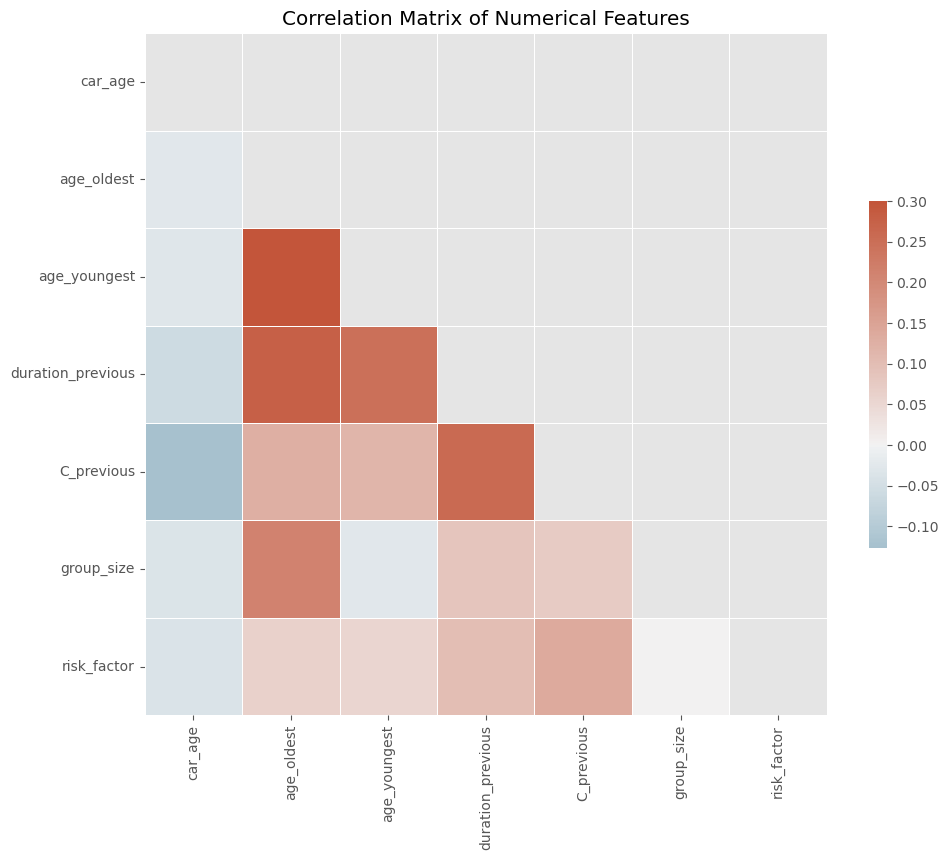

In [93]:
# Exclude the three additional features from the correlation analysis
numerical_features = ['car_age', 'age_oldest', 'age_youngest', 'duration_previous', 'C_previous', 'group_size', 'risk_factor']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Identify features exhibiting multicollinearity (correlation coefficient above a certain threshold)
threshold = 0.7  # Define a threshold for high correlation
highly_correlated_features = set()  # Initialize a set to store highly correlated features

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

# Print the highly correlated features
print("Features exhibiting multicollinearity:")
print(highly_correlated_features)


# Compute the correlation matrix
corr = df[numerical_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title to the plot
plt.title('Correlation Matrix of Numerical Features')

# Show the plot
plt.show()

#### 8.3:

Refit `model_region` after dropping these redundant predictor(s); call this `model_region_no_oldest`.

**Answer.**

In [94]:
# Define the formula for the model without the redundant predictors
formula_region_no_oldest = formula_region.replace(' + age_oldest + age_youngest', '')

# Fit the model using the updated formula
model_region_no_oldest = smf.ols(formula=formula_region_no_oldest, data=df)
results_region_no_oldest = model_region_no_oldest.fit()

# Print summary of the updated model
print(results_region_no_oldest.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:16:14   Log-Likelihood:                -77072.
No. Observations:               15483   AIC:                         1.543e+05
Df Residuals:                   15419   BIC:                         1.548e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### 8.4

What would you do to diagnose the `model_region_no_oldest` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)

**Answer.**

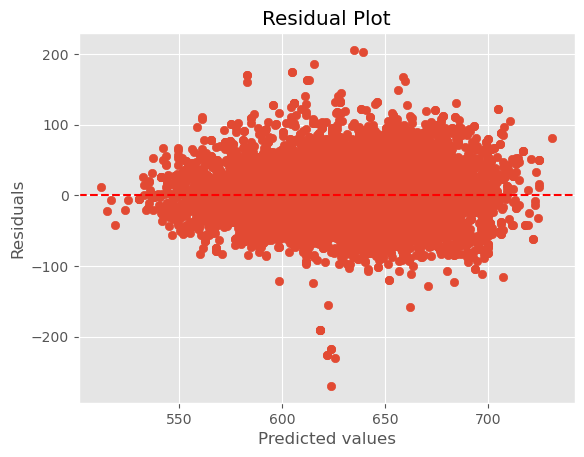

In [95]:
# Plot residuals against predicted values
plt.scatter(results_region_no_oldest.fittedvalues, results_region_no_oldest.resid)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.show()

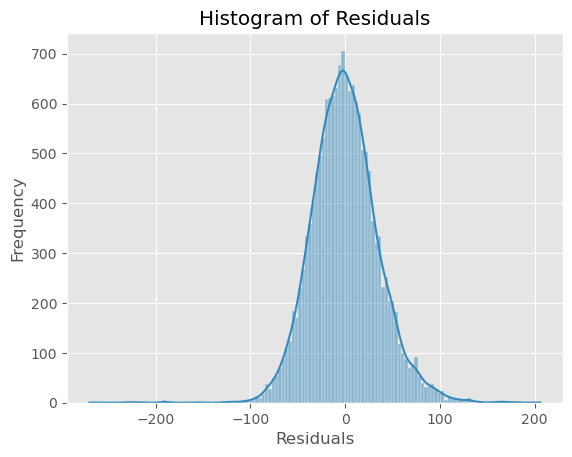

In [96]:
# Plot histogram of residuals
sns.histplot(results_region_no_oldest.resid, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

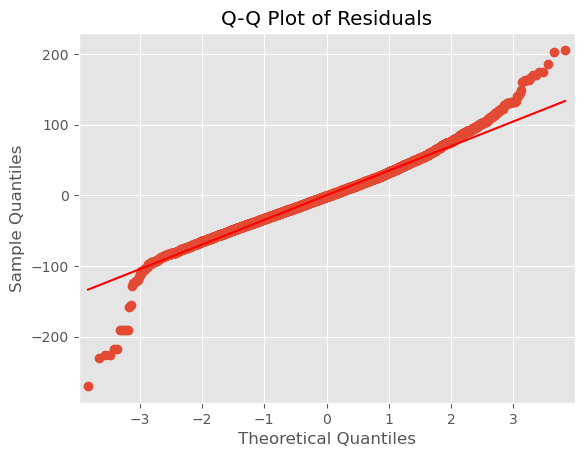

In [97]:
# Q-Q plot of residuals
sm.qqplot(results_region_no_oldest.resid, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

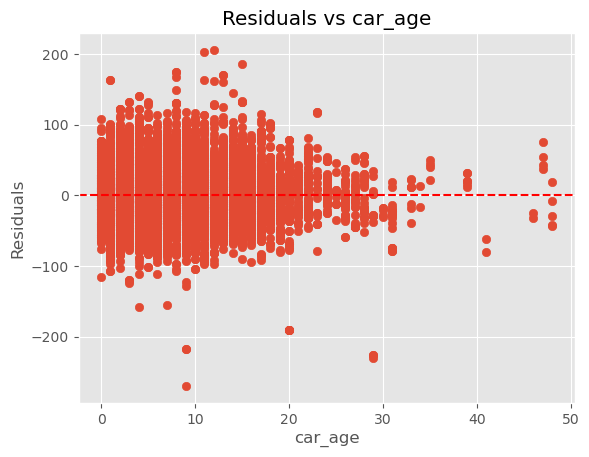

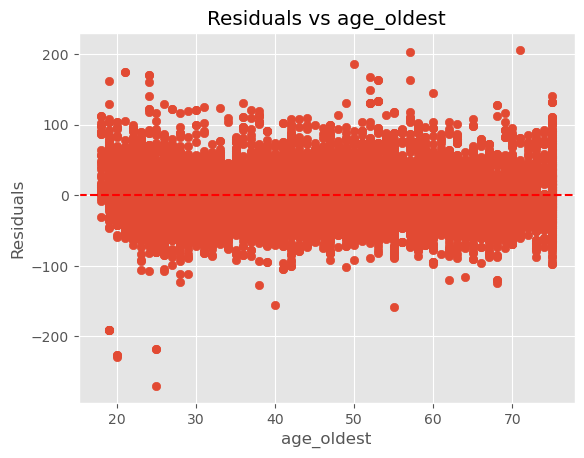

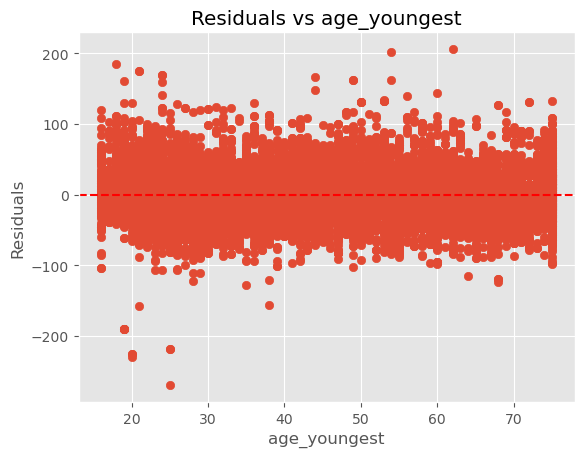

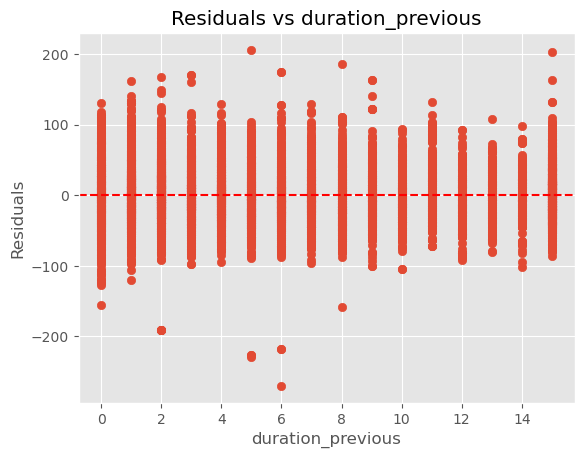

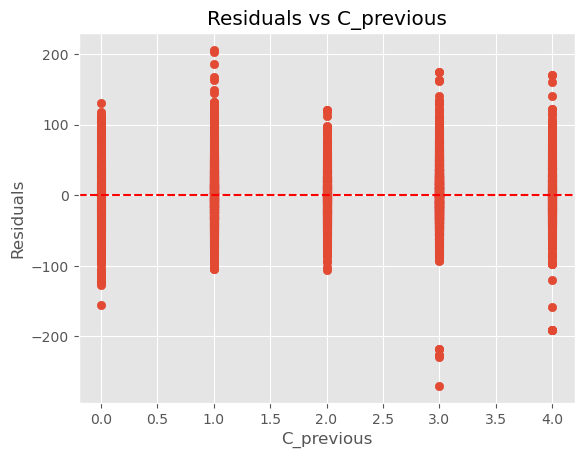

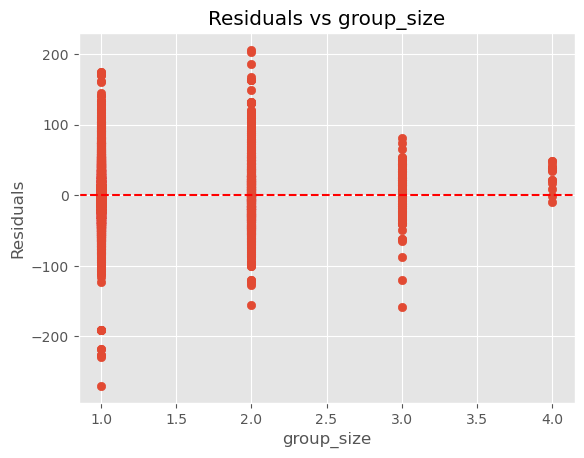

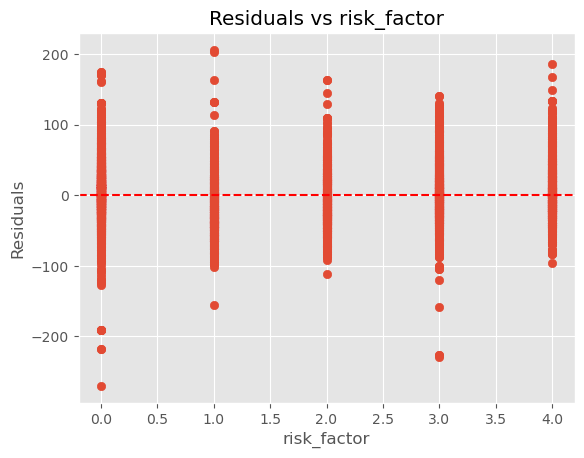

In [98]:
# Plot residuals against each predictor variable
for predictor in numerical_features:
    plt.scatter(df[predictor], results_region_no_oldest.resid)
    plt.xlabel(predictor)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs {predictor}')
    plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
    plt.show()

From the qq plot and the histogram we can see that the residuals follow a nice normal distribution. This tells us that the results of our model are reliable. The deviation at the ends of the qq plot suggests that there are some outliers and maybe some transformations need to be applied to some of the variables.  

### Exercise 9:

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model_region_no_oldest`. What value do you get?

**Answer.**

In [99]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to cost variable
transformed_cost, best_lambda = boxcox(df['cost'])

# Print the optimal lambda value
print("Optimal lambda for Box-Cox transformation:", best_lambda)

print(transformed_cost)

Optimal lambda for Box-Cox transformation: 0.5328144668200044
[51.89625313 55.38524544 59.26508018 ... 57.15883878 56.9153144
 57.11020444]


#### 9.2

Refit `model_region_no_oldest`, but now with the transformation as suggested by the Box-Cox. Call it `model_region_no_oldest_box_cox`.

**Answer.**

In [100]:
# Apply Box-Cox transformation to the cost variable using the optimal lambda value
df['cost'] = boxcox(df['cost'], lmbda=0.5328144668200044)

formula_region_no_oldest_box_cox = formula_region_no_oldest.replace('cost ~ 1 + ', '')

# Fit the model using the updated formula
model_region_no_oldest_box_cox = smf.ols(formula='np.sqrt(cost) ~ 1 + ' + formula_region_no_oldest_box_cox, data=df)
results_region_no_oldest_box_cox = model_region_no_oldest_box_cox.fit()

# Print summary of the updated model
print(results_region_no_oldest_box_cox.summary())

                            OLS Regression Results                            
Dep. Variable:          np.sqrt(cost)   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     202.5
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:16:17   Log-Likelihood:                 11591.
No. Observations:               15483   AIC:                        -2.305e+04
Df Residuals:                   15419   BIC:                        -2.257e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

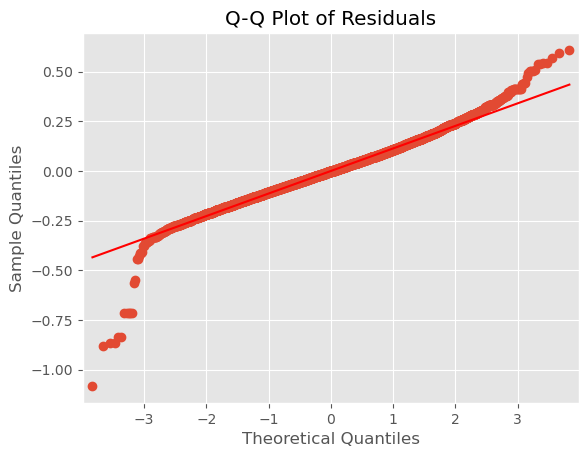

In [101]:
# Q-Q plot of residuals
sm.qqplot(results_region_no_oldest_box_cox.resid, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

## Conclusion

In this, you practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. You excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 